In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [11]:
x = torch.randn(100, 2)
y = torch.where(x[:,0] > x[:,1], 1, -1).float()
dataset = TensorDataset(x,y)
loader = DataLoader(dataset, batch_size=10)

In [3]:
class SVM(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2,1)
    
    def forward(self,x):
        return self.linear(x)

In [4]:
model = SVM()
criterion = nn.HingeEmbeddingLoss() # 사용하기 위해선 라벨값 양성 = 1 ,음성 = -1 클래스로 지정되어 있어야함
# (주어진 입력과 대상 사이의 경계선 손실값 계산하는 함수)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [9]:
for epoch in range(50):
    for inputs, targets in loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if (epoch+1) % 10 == 0:
        print(f'Epoch: {epoch+1}/50, Loss: {loss:.2f}')

Epoch: 10/50, Loss: 0.23
Epoch: 20/50, Loss: 0.22
Epoch: 30/50, Loss: 0.20
Epoch: 40/50, Loss: 0.19
Epoch: 50/50, Loss: 0.17


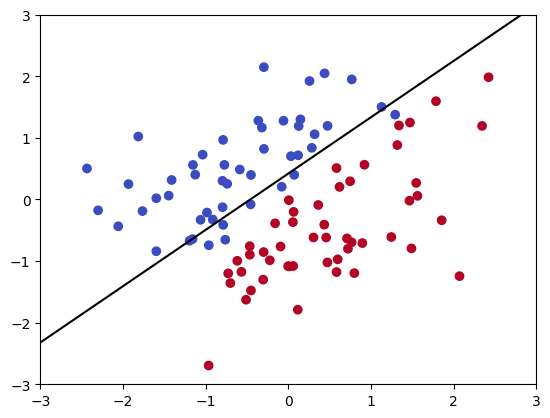

In [7]:
import matplotlib.pyplot as plt
import numpy as np

 

w = list(model.parameters())[0][0]
b = list(model.parameters())[1].item()
slope = (-w[0] / w[1]).detach().numpy()
intercept = (-b / w[1]).detach().numpy()
x_range = np.linspace(-3, 3, 100)
y_range = slope * x_range + intercept

 

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.plot(x_range, y_range, 'k-')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()